In [1]:
#importing Libraries
import pandas as pd

# Task 1

Set up and Dataframe Creation

In [2]:
# Load the dataset
df = pd.read_csv('messed_dataset.csv')
print(df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


# Task 2

- Basic summary of Data

In [3]:
#Exploring datatypes of features in set
df.dtypes

Name             object
Age              object
Email            object
Country          object
Salary           object
DateOfJoining    object
dtype: object

It seems we need to change datatype of some features.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           89 non-null     object
 1   Age            97 non-null     object
 2   Email          80 non-null     object
 3   Country        86 non-null     object
 4   Salary         94 non-null     object
 5   DateOfJoining  79 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


There are missing values in the dataset and we need to handle missing values

In [51]:
df.describe()

,Name,Age,Email,Country,Salary,DateOfJoining
count,89,97,80,86,94,79
unique,85,53,80,76,93,79
top,invalid,76.0,ycastro@example.org,Greece,invalid,2022-09-29
freq,5,6,1,2,2,1


# Task 3
- Handling Missing Data


In [4]:
#Exploring Missing data per column
df.isna().sum()


Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
dtype: int64

In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           50 non-null     object
 1   Age            50 non-null     object
 2   Email          50 non-null     object
 3   Country        50 non-null     object
 4   Salary         50 non-null     object
 5   DateOfJoining  50 non-null     object
dtypes: object(6)
memory usage: 2.7+ KB


In [6]:
#Converting dateofjoining column to datetime datatype and inavlid values as Nan
df['DateOfJoining'] = pd.to_datetime(df['DateOfJoining'], errors='coerce')  

In [7]:
#filling those invalid values
df.fillna(method='ffill',inplace=True)

In [8]:
# Convert 'Age' to numeric, setting errors='coerce' will convert invalid entries to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [9]:
#filling invalid entries with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
df["Salary"].unique()

array(['44694.24', '84223.29', '25660.99', '58550.56', '20175.11',
       '72362.02', '71261.36', 'invalid', '59670.5', '83580.8',
       '35390.77', '83514.58', '35671.38', '66871.64', '81661.97',
       '81367.57', '25219.6', '54801.7', '21408.87', '47293.85',
       '98826.59', '83842.6', '78453.84', '86579.95', '86286.69',
       '47755.97', '32205.53', '28951.24', '62929.05', '73916.51',
       '28583.22', '57795.75', '68794.39', '98396.21', '89683.17',
       '30773.53', '99507.66', '34369.87', '39875.14', '69624.01',
       '43013.14', '29455.0', '42435.96', '78048.75', '49354.13',
       '52834.29', '55583.62', '29992.69', '85290.44'], dtype=object)

In [11]:
df['Salary']=pd.to_numeric(df['Salary'],errors='coerce')
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           50 non-null     object        
 1   Age            50 non-null     float64       
 2   Email          50 non-null     object        
 3   Country        50 non-null     object        
 4   Salary         50 non-null     float64       
 5   DateOfJoining  50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 2.7+ KB


Task 4 DataOperations

In [13]:
#Creating a new column extracting year of joining
df['Joining_year']= df['DateOfJoining'].dt.year
df.head()

,Name,Age,Email,Country,Salary,DateOfJoining,Joining_year
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,2022
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,2022
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,2023
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08,2023
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11,2024


Task 4
Groupby Operations

In [14]:
grouped_df = df.groupby('Joining_year').agg({
    'Age': ['mean', 'min', 'max'],
    'Salary': ['mean']
})
grouped_df

Age                    Salary
                   mean   min   max          mean
Joining_year                                     
2020          45.733333  27.0  68.0  53190.549417
2021          56.454545  32.0  79.0  57067.948182
2022          59.666667  19.0  80.0  74186.132361
2023          58.500000  26.0  80.0  58703.030000
2024          59.000000  22.0  76.0  50716.880000

# Data Visualization
- Visualize the data by using the visualization libraries

In [15]:
#importing visualizing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

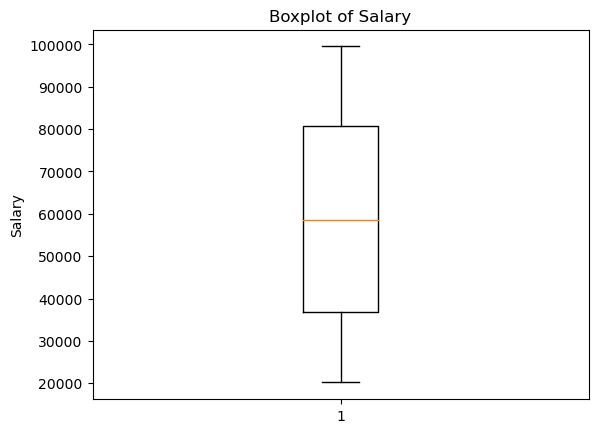

In [16]:
#boxolot of Salary
plt.boxplot(df['Salary'])
plt.ylabel('Salary')
plt.title("Boxplot of Salary")
plt.show()

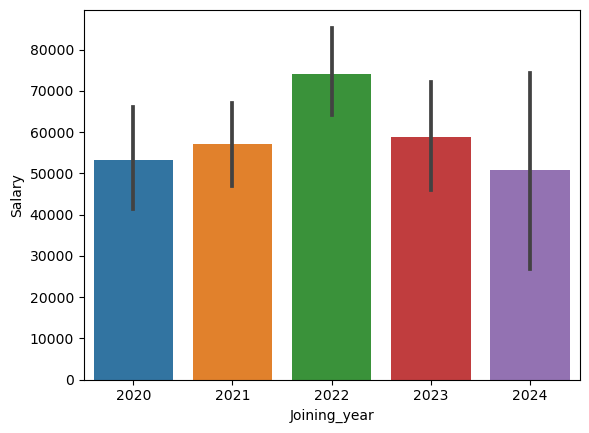

In [104]:
sns.barplot(data=df,x='Joining_year',y='Salary')
plt.show()